<ipython-input-2-576fece7bb9f>:184: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df.to_latex())


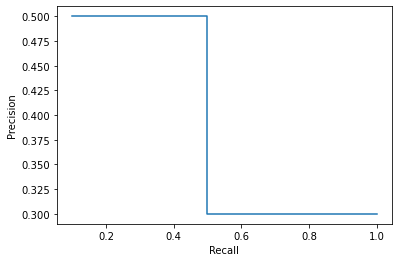

In [2]:
# SETUP
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import numpy as np
import json
import requests
import pandas as pd



QRELS_FILE = "information_systems_qrels.txt"
QUERY_URL = "http://localhost:8983/solr/courses/select?indent=true&q.op=OR&q=*%3A*&useParams="


# Read qrels to extract relevant documents
relevant = list(map(lambda el: el.strip(), open(QRELS_FILE).readlines()))

# handling errors
""" response = requests.get(QUERY_URL)
print(response.text)
if response.status_code == 200:
    try:
        data = response.json()
        results = data["response"]["docs"]
    except json.decoder.JSONDecodeError:
        print("Invalid JSON response")
    except KeyError:
        print("Missing 'response' or 'docs' in JSON response")
else:
    print(f"HTTP request failed with status code {response.status_code}") """

# Get query results from Solr instance
results = requests.get(QUERY_URL).json()["response"]["docs"]

'''
data = {
"responseHeader":{
  "status":0,
  "QTime":19,
  "params":{
    "q":"*:*",
    "indent":"true",
    "q.op":"OR",
    "useParams":"",
    "_":"1699094112609"
  }
},
"response":{
  "numFound":46,
  "start":0,
  "numFoundExact":True,
  "docs":[{
    "id":"M.EIC003",
    "title":"Processamento e Recuperação de Informação",
    "students":[6],
    "ects":[6],
    "objectives":["A unidade curricular de PRI tem como objetivo preparar os estudantes para conhecer, compreender, desenhar e desenvolver soluções para o processamento e recuperação de informação. Os objetivos específicos são: Sensibilizar os estudantes para os desafios associados à construção de sistemas de pesquisa de informação; Familiar os estudantes com os principais conceitos e técnicas associadas ao processamento e recuperação de informação; Capacitar os estudantes para desenhar, implementar e avaliar sistemas de pesquisa de informação sobre coleções de documentos."],
    "learning_outcomes":["Ao completar esta unidade curricular, o estudante deve ser capaz de projetar e implementar um sistema para o processamento e recuperação de informação. Em particular, o estudante deve ser capaz de: Identificar e descrever as principais tarefas associadas ao processamento e recuperação de informação; Descrever a arquitetura e funcionamento de um sistema de pesquisa de informação; Descrever as tarefas associadas às fases de processamento de uma coleção (offline) e de processamento de interrogações (online); Distinguir os diferentes modelos de recuperação de informação, identificando os seus princípios, os modelos para a representação de documentos, e as medidas de semelhança; Descrever e implementar diferentes técnicas para a indexação de informação; Descrever e implementar diferentes técnicas para a recuperação e ordenação de resultados;"],
    "_version_":1779990199034445824
  },{
    "id":"M.EIC034",
    "title":"Computação Paralela Avançada",
    "students":[0],
    "ects":[6],
    "objectives":["ENQUADRAMENTO A programação paralela e distribuída está a tornar-se o paradigma comum de programação dada a evolução do hardware para arquiteturas multicore e elementos massivamente paralelos como as GPUs. O computador pessoal atual é composto por vários processadores que coletivamente disponibilizam maior capacidade de processamento, do que os anteriores single-core, mas que individualmente têm menor capacidade. Os programadores terão de dominar a programação multi-processador para que possam utilizar com eficiência as máquinas do presente e do futuro. OBJECTIVOS Aquisição de conhecimentos conducentes à utilização simultânea de várias unidades de processamento num sistema de computação. Construção de bases sólidas sobre arquiteturas paralelas, paralelização de algoritmos, modelos de programação, sincronização de processos e medidas de desempenho, através do desenvolvimento de programas. Componente ciêntifica:50% Componente técnica:50%"],
    "learning_outcomes":["Os estudantes no final deverão ser capazes de: a) Analisar um problema e identificar o modelo de paralelização mais adequado (Conhecimento e compreensão) b) Escrever programas segundo o modelo de passagem de mensagens e memória partilhada (Análise e Prática) C) Elaborar soluções paralelas para novos problemas (Especificação) D) Utilização de modelos computacionais para estimar o tempo de computação das aplicações (Investigação) E) Conhecimentos de concorrência de processos e implementação de boas práticas para efetuar partilha de recursos (competências transferíveis)."],
    "_version_":1779990199108894720
  },{
    "id":"M.EIC047",
    "title":"Web Semântica e Dados Ligados",
    "students":[0],
    "ects":[6],
    "objectives":["ENQUADRAMENTO A unidade curricular \"Linguagens de Anotação e Processamento de Documentos\" tem como contexto o uso generalizado de linguagens de anotação para a representação de informação semi-estruturada e a existência de ferramentas normalizadas para o seu tratamento. A unidade curricular também aborda a noção de Web of Things e integração semântica de dados, como descrição semântica de APIs, Serviços RESTful, e aprendizagem e instanciação de ontologias. OBJETIVOS ESPECÍFICOS 1. Sensibilizar os estudantes para as múltiplas aplicações não triviais das linguagens de anotação; 2. Familiarizar os estudantes com tecnologias de processamento e armazenamento de informação semi-estruturada; 3. Familiarizar os estudantes com as arquitecturas orientadas a serviços e serviços Web; 4. Aprender tecnologias de Semantic Web e instanciação de ontologias; 5. Explorar tecnologias de definição de smart services e IoT, e experiência no desenvolvimento de aplicações."],
    "learning_outcomes":["No final desta unidade curricular o estudante deverá ser capaz de: - Identificar os usos das linguagens de anotação em documentos, em repositórios de dados e no suporte a aplicações; - Criar modelos para documentos XML ; - Distinguir as linguagens normalizadas para domínios de aplicação e os usos ad-hoc da anotação; - Interpretar os resultados do processamento de documentos com as tecnologias baseadas em XML ; - Avaliar comparativamente soluções baseadas em XML e outras para suporte à troca de informação entre aplicações; - Demonstrar conhecimento em JSON; - Utilizar REST-based APIs e processar JSON para obter informação externa mais rica; - Comparar as linguagens de anotação e outras representações de documentos e de dados do ponto de vista da preservação ao longo das mudanças tecnológicas; - Perceber as tecnologias de web semântica e instanciar ontologias; - Conhecer tecnologias de definição de smart services e IoT, e ser capaz de desenvolver aplicações relacionadas; - Desenvolver um protótipo de aplicação envolvendo o processamento de documentos."],
    "_version_":1779990199115186176
  },{
    "id":"M.EIC026",
    "title":"Serviços e Aplicações Multimédia",
    "students":[0],
    "ects":[6],
    "objectives":["Esta UC tem por missão fornecer uma perspectiva geral a nível tecnológico sobre a geração, codificação, distribuição e percepção de sinais multimédia. Pretende dotar os estudantes de novos conhecimentos específicos para o processamento e codificação de sinais audiovisuais e consolidar conhecimentos gerais sobre processamento de sinais e redes de computadores para projectar e gerir aplicações e serviços multimédia. Pretender ainda que os estudantes adquiram conhecimentos sobre boas práticas a adoptar na criação de aplicações multimédia interactivas que permitam comunicar de forma eficiente e eficaz informação media, bem como ferramentas para editar, manipular e interligar os dados multimédia."],
    "learning_outcomes":["No final da unidade curricular os estudantes serão capazes de: - identificar as características relevantes dos sinais visuais e sonoros no mundo real. - descrever os conceitos fundamentais para a representação digital e compressão de sinais audio e visuais utilizados em aplicações e serviços multimédia; - compreender a natureza dos sistemas humanos de audição e visão, assim como a sua importância para os modelos de representação, compressão e apresentação eficiente de sinais multimédia. -explicar os fundamentos das principais técnicas genéricas de codificação de fontes media, com e sem perdas. - distinguir e identificar as ferramentas mais utilizadas na compressão dos sinais media -identificar as principais normas internacionais de codificação eficiente de sinais multimédia - explicar as características básicas dos algoritmos usados nessas normas e relacionar com as características dos sinais e do sistema audiovisual humano, assim como com as ferramentas estudadas. - selecionar ferramentas e /ou normas de compressão de acordo com os requisitos da aplicação -identificar requisitos e projetar sistemas de acesso e comunicação de informação multimédia - conhecer e utilizar ferramentas para criação de aplicações multimédia."],
    "_version_":1779990199119380480
  },{
    "id":"M.EIC031",
    "title":"Análise e Integração de Dados",
    "students":[0],
    "ects":[6],
    "objectives":["Dotar os alunos da capacidade de projetar, implementar e explorar armazéns de dados (data warehouses)."],
    "learning_outcomes":["(1) Planear e gerir o ciclo de vida de um projeto de armazém de dados; (2) Identificar os requisitos e as fontes de dados; (3) Projetar um modelo dimensional adequado; (4) Desenhar e implementar um processo de extração, transformação e carregamento de dados; (5) Especificar e implementar aplicações e modelos de acesso e visualização da informação no armazém de dados; (6) Otimizar o armazém de dados pela criação de agregações e índices; (7) Criar e explorar implementações multidimensionais; (8) Interrogar implementações multidimensionais; (9) Definir os metadados necessários para efeitos de auditoria."],
    "_version_":1779990199122526208
  },{
    "id":"M.EIC010",
    "title":"Arquitetura de Sistemas de Software",
    "students":[1],
    "ects":[6],
    "objectives":["À medida que os sistemas de software aumentam de dimensão e de complexidade torna-se cada vez mais importante compreendê-los a níveis de abstracção mais elevados. A arquitectura de um sistema de software descreve a sua estrutura global em termos dos seus componentes, das propriedades externas desses componentes e das suas interrelações. Para sistemas de média e grande dimensão a escolha adequada da arquitectura assume uma importância crucial para o sucesso do seu desenvolvimento. A disciplina de Arquitecturas de Sistemas de Software tem como objectivo principal introduzir os conceitos de arquitecturas de software, padrões de desenho e tópicos directamente relacionados, tais como o de componentes de software. Pretende ensinar a desenhar, compreender e avaliar arquitecturas de sistemas de software, tanto ao nível de abstracção de macro-arquitectura como de micro-arquitectura e assim familiarizar os alunos com os conceitos fundamentais de arquitectura de software, as propriedades e aplicabilidade dos diferentes estilos de arquitectura existentes, os padrões de desenho mais populares, componentes de software, arquitecturas reutilizáveis e as relações destes conceitos todos com a reutilização de software."],
    "learning_outcomes":["No final da disciplina os alunos deverão ser capazes de: • Reconhecer os principais padrões de arquitetura existentes para sistemas de software. • Descrever uma arquitetura de forma precisa. • Idealizar diferentes arquiteturas alternativas para resolver um mesmo problema e avaliar de forma justificada qual é a melhor em função dos atributos de qualidade que suporta. • Reconhecer e compreender diversos padrões de desenho. • Conhecer e aplicar diversos métodos e técnicas de reutilização de software. • Identificar os fatores chave no desenho de arquiteturas de software evoluíveis. • Desenhar um plano de migração entre diferentes tipos de arquitetura. • Construir um sistema de software de média dimensão de acordo com uma especificação de requisitos, selecionando e aplicando padrões de desenho e de arquitetura, usando um método de desenvolvimento baseado em componentes e tecnologias recentes. • Utilizar ferramentas que tornem mais expedita a realização das tarefas de desenvolvimento."],
    "_version_":1779990199125671936
  },{
    "id":"M.EIC038",
    "title":"Modelação e Simulação",
    "students":[1],
    "ects":[6],
    "objectives":["Os objectivos da disciplina são: Apresentar os conceitos básicos de modelação e simulação e as suas áreas de aplicação; Apresentar as principais fases do ciclo de vida de um projeto de simulação; Apresentar os principais tipos de modelos e a sua adequação ao tratamento de diferentes problemas; Apresentar os principais aspetos arquiteturais das ferramentas de modelação e simulação; Introduzir ferramentas de modelação e simulação."],
    "learning_outcomes":["Após concluir com sucesso o curso da disciplina, um aluno deverá ser capaz de: Identificar problemas, construir modelos e desenvolver projetos de simulação; Analisar e aplicar resultados de simulação; Incluir técnicas de simulação em diferentes áreas de engenharia e investigação; Demonstrar entendimento das principais áreas de interesse e atuais desafios na área de modelação e simulação; Utilizar ferramentas de modelação e simulação; Projetar e implementar ferramentas e ambientes de simulação para fins específicos ou gerais; Conceber, implementar e avaliar projetos de simulação."],
    "_version_":1779990199128817664
  },{
    "id":"M.EIC033",
    "title":"Computação Heterogénea Eficiente",
    "students":[0],
    "ects":[6],
    "objectives":["Esta unidade curricular abrange todos os estágios do projeto de aplicações para sistemas heterogéneos (plataformas heterogéneas de múltiplos núcleos/processadores, GPGPUs e/ou aceleradores  baseados em FPGA). Além do componente de exposição de exemplos e casos de uso, uma componente importante para a aquisição de conhecimento é a execução de um projeto por grupos de estudantes. A exposição dos tópicos e sua prática contribuem decisivamente para permitir que os estudantes alunos se familiarizem com o conjunto de conhecimentos relativos a sistemas heterogéneos. O conteúdo abordado no plano de estudos contribuirá fortemente para as competências descritas."],
    "learning_outcomes":["Descrever e explicar os processos, metodologias e melhores práticas associadas ao desenvolvimento de aplicações no contexto de sistemas de computação heterogéneos de alto desempenho; Descrever e explicar os diferentes estágios do processo para mapear uma aplicação para arquiteturas heterogéneas; Identificar os principais problemas e desafios no mapeamento e otimização de aplicações; Realizar o ajuste de uma aplicação de acordo com requisitos específicos, como desempenho e consumo de energia; Explicar e aplicar um conjunto abrangente de transformações de código fonte a fonte para o mapeamento e ajuste de códigos de aplicações em sistemas heterogéneos de alto desempenho; Descrever e selecionar as ferramentas disponíveis para ajudar a ajustar e mapear uma aplicação para um sistema de computação com vários núcleos heterogéneos / homogéneos; Analisar exemplos de aplicações da vida real para descobrir métodos para mapear e ajustar as suas próprias aplicações."],
    "_version_":1779990199131963392
  },{
    "id":"M.EIC044",
    "title":"Técnicas Avançadas de Construção de Software",
    "students":[0],
    "ects":[6],
    "objectives":["Os estudantes devem ser capazes de identificar e aplicar técnicas avançadas de especificação, síntese e manipulação de artefactos executáveis em diferentes fases de desenvolvimento de software, com o intuito de promover atributos de qualidade, tais como confiabilidade, flexibilidade, testabilidade e performance. Em particular, pretende-se reduzir ao máximo o tempo investido a \"programar\", automatizando várias facetas dessa atividade."],
    "learning_outcomes":["Identificar problemas amenos a técnicas de metaprogramação e desenvolvimento automático; Desenhar modelos/meta-modelos específicos de domínio; Processar instanciações de especificações textuais com combinadores de parsing, bem como respectivos mecanismos de execução; Aplicar técnicas de derivação/geração de código/comportamento automaticamente a partir de especificações de alto nível Aplicar técnicas de aprendizagem computacional à construção de código; Depurar programas por especificação incremental de propriedades; Aplicar técnicas de correção automática de programas; Outras técnicas avançadas de desenvolvimento"],
    "_version_":1779990199134060544
  },{
    "id":"M.EIC046",
    "title":"Tópicos Avançados de Interação e Multimédia",
    "students":[0],
    "ects":[6],
    "objectives":["1 - INTRODUÇÃO As áreas da Interação e da Multimédia sofrem uma evolução contínua, muitas vezes até de forma disruptiva. Os engenheiros informáticos devem ser capazes de monitorizar os resultados da investigação científica e do  desenvolvimento tecnológico, adequando as suas opções e práticas a essa evolução. 2 - OBJETIVOS ESPECÍFICOS O objetivo desta unidade curricular é transmitir o conhecimento sobre o acompanhamento dos processos de investigação e desenvolvimento em áreas avançadas da Interação e da Multimédia."],
    "learning_outcomes":["1) Adquirir conhecimento estruturados sobre vários tópicos relativos a interação e multimédia. 2) Formar competências em processos de investigação científica. 3) Desenvolver e aprofundar conhecimentos mais específicos em um dos tópicos avançados relativos a interação e multimédia. 4) Aprofundar competências práticas na realização de estudos/tecnologias indispensáveis à realização do trabalho labotatorial. 5) Desenvolver competências na comunicação oral de trabalho realizado"],
    "_version_":1779990199136157696
  }]
}
}

results = data["response"]["docs"]
'''

# METRICS TABLE
# Define custom decorator to automatically calculate metric based on key
metrics = {}
metric = lambda f: metrics.setdefault(f.__name__, f)

@metric
def ap(results, relevant):
    """Average Precision"""
    precision_values = []
    relevant_count = 0

    for idx, doc in enumerate(results):
        if doc['id'] in relevant:
            relevant_count += 1
            precision_at_k = relevant_count / (idx + 1)
            precision_values.append(precision_at_k)

    if not precision_values:
        return 0.0

    return sum(precision_values)/len(precision_values)

@metric
def p10(results, relevant, n=10):
    """Precision at N"""
    return len([doc for doc in results[:n] if doc['id'] in relevant])/n

def calculate_metric(key, results, relevant):
    return metrics[key](results, relevant)

# Define metrics to be calculated
evaluation_metrics = {
    'ap': 'Average Precision',
    'p10': 'Precision at 10 (P@10)'
}

# Calculate all metrics and export results as LaTeX table
df = pd.DataFrame([['Metric','Value']] +
    [
        [evaluation_metrics[m], calculate_metric(m, results, relevant)]
        for m in evaluation_metrics
    ]
)

with open('results.tex','w') as tf:
    tf.write(df.to_latex())



# PRECISION-RECALL CURVE
# Calculate precision and recall values as we move down the ranked list
precision_values = [
    len([
        doc 
        for doc in results[:idx]
        if doc['id'] in relevant
    ]) / idx 
    for idx, _ in enumerate(results, start=1)
]

recall_values = [
    len([
        doc for doc in results[:idx]
        if doc['id'] in relevant
    ]) / len(relevant)
    for idx, _ in enumerate(results, start=1)
]

precision_recall_match = {k: v for k,v in zip(recall_values, precision_values)}

# Extend recall_values to include traditional steps for a better curve (0.1, 0.2 ...)
recall_values.extend([step for step in np.arange(0.1, 1.1, 0.1) if step not in recall_values])
recall_values = sorted(set(recall_values))

# Extend matching dict to include these new intermediate steps
for idx, step in enumerate(recall_values):
    if step not in precision_recall_match:
        if recall_values[idx-1] in precision_recall_match:
            precision_recall_match[step] = precision_recall_match[recall_values[idx-1]]
        else:
            precision_recall_match[step] = precision_recall_match[recall_values[idx+1]]

disp = PrecisionRecallDisplay([precision_recall_match.get(r) for r in recall_values], recall_values)
disp.plot()
plt.savefig('precision_recall.pdf')
